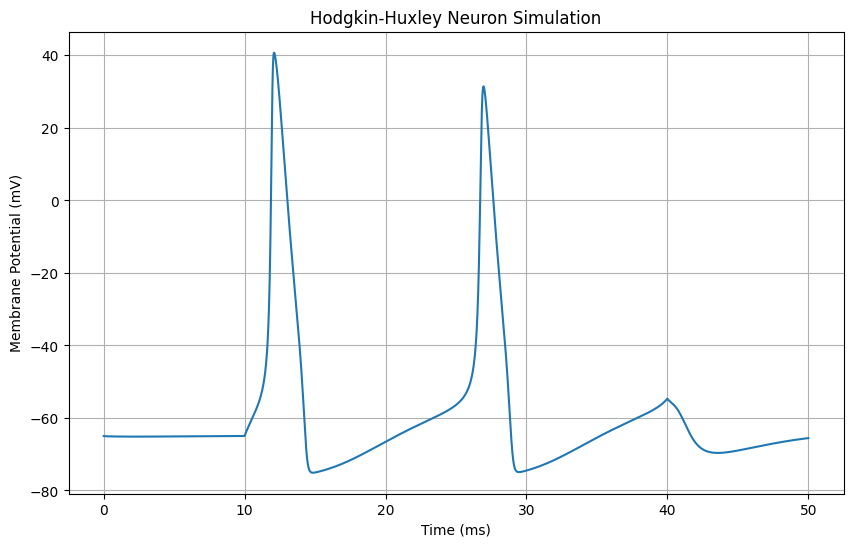

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# シミュレーションパラメータ
dt = 0.01  # 時間刻み [ms]
T = 50.0   # シミュレーション時間 [ms]
time = np.arange(0, T + dt, dt)

# ニューロンのパラメータ
C_m = 1.0  # 膜容量 [uF/cm^2]
g_Na = 120.0  # ナトリウムチャネルの最大コンダクタンス [mS/cm^2]
g_K = 36.0    # カリウムチャネルの最大コンダクタンス [mS/cm^2]
g_L = 0.3     # 漏れチャネルのコンダクタンス [mS/cm^2]
E_Na = 50.0   # ナトリウムの平衡電位 [mV]
E_K = -77.0   # カリウムの平衡電位 [mV]
E_L = -54.387 # 漏れチャネルの平衡電位 [mV]

# 細胞外空間（ECS）の体積比パラメータ
# ECSの体積が大きいほど、イオンの拡散が促進されると仮定
ecs_volume_ratio = 1.0  # 1.0が基準値

# 初期値
V = -65.0  # 膜電位 [mV]
m = 0.05
h = 0.6
n = 0.32

# 結果を保存するリスト
V_trace = []

# イオンチャネルのゲーティング変数のアルファとベータ関数
def alpha_m(V): return 0.1 * (V + 40.0) / (1 - np.exp(-(V + 40.0) / 10))
def beta_m(V): return 4.0 * np.exp(-(V + 65.0) / 18)
def alpha_h(V): return 0.07 * np.exp(-(V + 65.0) / 20)
def beta_h(V): return 1.0 / (1 + np.exp(-(V + 35.0) / 10))
def alpha_n(V): return 0.01 * (V + 55.0) / (1 - np.exp(-(V + 55.0) / 10))
def beta_n(V): return 0.125 * np.exp(-(V + 65) / 80)

# シミュレーションループ
for t in time:
    # イオンチャネルのコンダクタンス
    g_Na_t = g_Na * (m ** 3) * h
    g_K_t = g_K * (n ** 4)
    g_L_t = g_L

    # イオン電流
    I_Na = g_Na_t * (V - E_Na)
    I_K = g_K_t * (V - E_K)
    I_L = g_L_t * (V - E_L)

    # 外部からの刺激電流（例として10msから40msの間に10μA/cm^2の電流を注入）
    I_ext = 10.0 if 10.0 <= t <= 40.0 else 0.0

    # 膜電位の更新（ECSの体積比を考慮）
    dV = dt * (I_ext - I_Na - I_K - I_L) / (C_m * ecs_volume_ratio)
    V += dV

    # ゲーティング変数の更新
    dm = dt * (alpha_m(V) * (1 - m) - beta_m(V) * m)
    dh = dt * (alpha_h(V) * (1 - h) - beta_h(V) * h)
    dn = dt * (alpha_n(V) * (1 - n) - beta_n(V) * n)
    m += dm
    h += dh
    n += dn

    # 結果の保存
    V_trace.append(V)

# 結果のプロット
plt.figure(figsize=(10, 6))
plt.plot(time, V_trace)
plt.title('Hodgkin-Huxley Neuron Simulation')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.grid(True)
plt.show()